In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dir_grl = '/home/edgar/Source/Repos/Observatorio-Ciudades/calidad-aire/data/'
dir_data = dir_grl+'processed/cdmx/cdmx_2017-2020_filtered.csv'
cdmx_filter = pd.read_csv(dir_data).set_index(['FECHA','HORA','PARAM'])

param = ['CO','NO2', 'O3','PM10','PM25','SO2']

cdmx_filter

ACO  AJU  AJM  ATI  CAM  CCA  CHO  CUA  CUT  FAC  ...  \
FECHA      HORA PARAM                                                    ...   
2017-01-01 1    CO     NaN  NaN  0.5  0.8  0.8  0.8  1.1  0.5  NaN  1.7  ...   
           2    CO     NaN  NaN  0.5  0.8  0.9  0.7  1.1  0.6  NaN  1.2  ...   
           3    CO     NaN  NaN  0.5  1.0  0.9  0.9  0.9  0.7  NaN  1.3  ...   
           4    CO     1.2  NaN  0.5  0.9  1.1  1.1  0.8  0.6  NaN  1.1  ...   
           5    CO     1.0  NaN  0.4  1.1  1.7  1.1  1.5  0.5  NaN  1.1  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2020-04-30 20   SO2    NaN  NaN  1.0  1.0  1.0  0.0  NaN  1.0  2.0  2.0  ...   
           21   SO2    NaN  NaN  1.0  1.0  1.0  0.0  NaN  1.0  2.0  1.0  ...   
           22   SO2    NaN  NaN  1.0  1.0  2.0  0.0  NaN  1.0  2.0  1.0  ...   
           23   SO2    NaN  NaN  1.0  1.0  1.0  0.0  NaN  0.0  1.0  1.0  ...   
           24   SO2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                       TLA  TLI  UIZ  UAX  VIF  XAL  MPA  BJU  INN  GAM  
FECHA      HORA PARAM                                                    
2017-01-01 1    CO     1.6  NaN  1.4  1.2  NaN  1.2  NaN  1.0  0.1  NaN  
           2    CO     1.4  NaN  1.2  1.4  NaN  2.2  NaN  1.3  0.1  NaN  
           3    CO     1.1  NaN  1.6  1.3  NaN  2.3  NaN  1.1  0.1  NaN  
           4    CO     1.1  NaN  1.4  1.3  NaN  2.7  0.3  1.2  0.1  NaN  
           5    CO     1.0  NaN  1.3  1.4  NaN  2.8  0.2  1.4  0.1  NaN  
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2020-04-30 20   SO2    3.0  NaN  2.0  0.0  1.0  NaN  NaN  1.0  0.0  NaN  
           21   SO2    2.0  NaN  2.0  0.0  1.0  NaN  NaN  0.0  0.0  NaN  
           22   SO2    2.0  NaN  2.0  0.0  1.0  NaN  NaN  0.0  0.0  NaN  
           23   SO2    2.0  NaN  2.0  0.0  1.0  NaN  NaN  0.0  0.0  NaN  
           24   SO2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[233472 rows x 32 columns]

In [6]:
dir_data[:-4]

'/home/edgar/Source/Repos/Observatorio-Ciudades/calidad-aire/data/processed/cdmx/cdmx_2017-2020_filtered'

In [19]:
def airquality_average(data_csv):
    
    month = [1,2,3,4]
    
    data_bydate = data_csv.groupby(level=('FECHA','PARAM')).mean().reset_index()
    data_bydate['FECHA'] = pd.to_datetime(data_bydate['FECHA'])
    
    for m in month:
        if m == 1: 
            filter_month=data_bydate[data_bydate['FECHA'].dt.month==m]

        else:

            month_tmp = data_bydate[data_bydate['FECHA'].dt.month==m]


            filter_month = filter_month.append(month_tmp)
    
    for p in param:
        
        data_bydateParam = filter_month[filter_month['PARAM']==p].set_index('FECHA')
        
        data_bydateParam = data_bydateParam.rolling(7, min_periods=1).mean()
        
        data_bydateParam.to_csv(dir_data[:-4]+'_'+p+'.csv')
        
    #return (data_bydateParam)


In [20]:
airquality_average(cdmx_filter)

In [12]:
cdmx_filter2 = cdmx_filter.groupby(level=('FECHA','PARAM')).mean().reset_index()
cdmx_filter2['FECHA'] = pd.to_datetime(cdmx_filter2['FECHA'])
cdmx_filter_month = pd.DataFrame()
month = [1,2,3,4]

cdmx_filter_month=cdmx_filter2[cdmx_filter2['FECHA'].dt.month==1]
month_tmp = cdmx_filter2[cdmx_filter2['FECHA'].dt.month==2]

#cdmx_filter_month.append(month_tmp, ignore_index=True)

for m in month:
    if m == 1: 
        filter_month=cdmx_filter2[cdmx_filter2['FECHA'].dt.month==m]
    
    else:
        
        month_tmp = cdmx_filter2[cdmx_filter2['FECHA'].dt.month==m]
    
    
    filter_month = filter_month.append(month_tmp)
    #filter_month = pd.merge(filter_month, month_tmp, how='outer', left_on='FECHA', right_on='FECHA')
    
filter_month


,FECHA,PARAM,ACO,AJU,AJM,ATI,CAM,CCA,CHO,CUA,...,TLA,TLI,UIZ,UAX,VIF,XAL,MPA,BJU,INN,GAM
0,2017-01-01,CO,0.509524,NaN,0.450000,0.687500,0.816667,0.641667,0.708333,0.579167,...,0.883333,NaN,0.841667,0.833333,NaN,1.412500,0.238095,0.833333,0.125000,NaN
1,2017-01-01,NO,5.523810,NaN,0.625000,NaN,7.041667,3.750000,NaN,2.250000,...,14.333333,16.125000,4.958333,6.000000,NaN,27.958333,NaN,NaN,NaN,NaN
2,2017-01-01,NO2,16.952381,NaN,9.333333,NaN,23.041667,18.958333,NaN,11.791667,...,27.500000,27.083333,24.791667,20.833333,NaN,33.875000,NaN,NaN,NaN,NaN
3,2017-01-01,NOX,22.523810,NaN,9.958333,NaN,30.000000,22.791667,NaN,14.125000,...,41.916667,43.166667,29.625000,26.541667,NaN,61.791667,NaN,NaN,NaN,NaN
4,2017-01-01,O3,33.666667,28.095238,46.666667,26.250000,36.166667,32.250000,26.416667,36.375000,...,32.916667,29.375000,35.041667,33.125000,27.291667,31.791667,47.095238,31.583333,37.000000,30.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,2020-04-30,NOX,NaN,NaN,14.260870,15.913043,18.565217,15.304348,NaN,17.347826,...,25.869565,NaN,14.772727,13.434783,16.304348,NaN,NaN,NaN,NaN,NaN
9724,2020-04-30,O3,NaN,46.782609,59.217391,35.913043,48.478261,54.913043,NaN,50.521739,...,38.782609,NaN,53.227273,52.434783,43.000000,NaN,NaN,47.000000,45.260870,49.913043
9725,2020-04-30,PM10,NaN,NaN,25.208333,28.173913,24.294118,NaN,NaN,32.125000,...,24.727273,NaN,23.761905,NaN,44.043478,NaN,NaN,26.583333,21.083333,NaN
9726,2020-04-30,PM25,NaN,11.041667,12.166667,NaN,12.235294,12.541667,NaN,NaN,...,12.000000,NaN,12.190476,11.434783,NaN,NaN,NaN,13.083333,11.541667,NaN


In [43]:
month2 = pd.merge(cdmx_filter_month, month_tmp, how='outer', left_on='FECHA', right_on='FECHA')
month2

,FECHA,PARAM_x,ACO_x,AJU_x,AJM_x,ATI_x,CAM_x,CCA_x,CHO_x,CUA_x,...,TLA_y,TLI_y,UIZ_y,UAX_y,VIF_y,XAL_y,MPA_y,BJU_y,INN_y,GAM_y
0,2017-01-01,CO,0.509524,NaN,0.450000,0.6875,0.816667,0.641667,0.708333,0.579167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,NO,5.523810,NaN,0.625000,NaN,7.041667,3.750000,NaN,2.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,NO2,16.952381,NaN,9.333333,NaN,23.041667,18.958333,NaN,11.791667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,NOX,22.523810,NaN,9.958333,NaN,30.000000,22.791667,NaN,14.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,O3,33.666667,28.095238,46.666667,26.2500,36.166667,32.250000,26.416667,36.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.375000,46.750000,36.458333,35.208333,39.083333,64.125000,NaN,NaN,NaN,NaN
1892,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.541667,28.041667,37.125000,42.333333,26.166667,28.416667,51.833333,33.958333,39.875000,32.625000
1893,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.583333,NaN,56.291667,NaN,NaN,NaN,NaN,41.666667,28.583333,51.541667
1894,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.541667,NaN,25.500000,21.250000,NaN,NaN,NaN,20.833333,15.458333,23.958333


In [19]:
cdmx_bydate = cdmx_filter.groupby(level=('FECHA','PARAM')).mean().reset_index().set_index('FECHA')
#cdmx_bydate
cdmx_bydateParam = cdmx_bydate[cdmx_bydate['PARAM']=='PM10']
cdmx_bydatePM10.head(50)

,PARAM,ACO,AJU,AJM,ATI,CAM,CCA,CHO,CUA,CUT,...,TLA,TLI,UIZ,UAX,VIF,XAL,MPA,BJU,INN,GAM
FECHA,,,,,,,,,,,,,,,,,,,,,
2017-01-01,PM10,87.181818,NaN,32.708333,NaN,68.750000,NaN,57.916667,35.625000,94.000000,...,79.142857,104.652174,NaN,NaN,139.458333,142.000000,25.909091,63.333333,23.125000,NaN
2017-01-02,PM10,53.541667,NaN,28.416667,NaN,58.086957,NaN,56.181818,35.291667,68.545455,...,58.541667,71.227273,NaN,NaN,85.809524,83.291667,31.916667,34.666667,19.583333,NaN
2017-01-03,PM10,61.916667,NaN,47.291667,NaN,77.416667,NaN,99.708333,48.333333,85.125000,...,73.000000,73.833333,NaN,NaN,85.750000,113.458333,52.583333,71.214286,34.208333,NaN
2017-01-04,PM10,54.409091,NaN,33.416667,NaN,60.842105,NaN,100.208333,34.333333,70.583333,...,56.833333,67.666667,NaN,NaN,76.333333,127.142857,36.045455,63.125000,21.500000,NaN
2017-01-05,PM10,73.045455,NaN,27.208333,NaN,84.125000,NaN,93.083333,35.708333,88.913043,...,60.666667,72.391304,NaN,NaN,100.826087,162.833333,NaN,62.291667,12.500000,NaN
2017-01-06,PM10,91.541667,NaN,43.833333,NaN,97.833333,NaN,99.458333,42.666667,97.750000,...,86.083333,109.625000,NaN,NaN,165.217391,228.916667,41.238095,70.791667,22.791667,NaN
2017-01-07,PM10,70.250000,NaN,56.791667,NaN,81.875000,NaN,81.791667,53.125000,74.458333,...,82.958333,79.166667,NaN,NaN,87.541667,125.333333,61.000000,71.500000,37.083333,NaN
2017-01-08,PM10,49.875000,NaN,71.916667,NaN,77.583333,NaN,84.166667,57.916667,48.625000,...,78.333333,53.541667,NaN,NaN,51.826087,82.583333,74.291667,64.125000,32.333333,NaN
2017-01-09,PM10,57.083333,NaN,55.500000,NaN,78.708333,NaN,64.708333,57.666667,61.583333,...,78.000000,70.083333,NaN,NaN,72.666667,95.791667,38.125000,76.416667,22.125000,NaN


In [21]:
cdmx_bydatePM10.rolling(7, min_periods=1).mean().head(50)

,ACO,AJU,AJM,ATI,CAM,CCA,CHO,CUA,CUT,FAC,...,TLA,TLI,UIZ,UAX,VIF,XAL,MPA,BJU,INN,GAM
FECHA,,,,,,,,,,,,,,,,,,,,,
2017-01-01,87.181818,NaN,32.708333,NaN,68.750000,NaN,57.916667,35.625000,94.000000,58.666667,...,79.142857,104.652174,NaN,NaN,139.458333,142.000000,25.909091,63.333333,23.125000,NaN
2017-01-02,70.361742,NaN,30.562500,NaN,63.418478,NaN,57.049242,35.458333,81.272727,48.354167,...,68.842262,87.939723,NaN,NaN,112.633929,112.645833,28.912879,49.000000,21.354167,NaN
2017-01-03,67.546717,NaN,36.138889,NaN,68.084541,NaN,71.268939,39.750000,82.556818,52.583333,...,70.228175,83.237593,NaN,NaN,103.672619,112.916667,36.803030,56.404762,25.638889,NaN
2017-01-04,64.262311,NaN,35.458333,NaN,66.273932,NaN,78.503788,38.395833,79.563447,51.426630,...,66.879464,79.344862,NaN,NaN,96.837798,116.473214,36.613636,58.084821,24.604167,NaN
2017-01-05,66.018939,NaN,33.808333,NaN,69.844146,NaN,81.419697,37.858333,81.433366,52.486759,...,65.636905,77.954150,NaN,NaN,97.635455,125.745238,36.613636,58.926190,22.183333,NaN
2017-01-06,70.272727,NaN,35.479167,NaN,74.509010,NaN,84.426136,38.659722,84.152805,55.322299,...,69.044643,83.232625,NaN,NaN,108.899111,142.940476,37.538528,60.903770,22.284722,NaN
2017-01-07,70.269481,NaN,38.523810,NaN,75.561295,NaN,84.049784,40.726190,82.767881,55.815217,...,71.032313,82.651774,NaN,NaN,105.848048,140.425170,41.448773,62.417517,24.398810,NaN
2017-01-08,64.939935,NaN,44.125000,NaN,76.823199,NaN,87.799784,43.910714,76.285738,54.856884,...,70.916667,75.350273,NaN,NaN,93.329156,131.937075,49.512536,62.530612,25.714286,NaN
2017-01-09,65.445887,NaN,47.994048,NaN,79.769110,NaN,89.017857,47.107143,75.291149,57.356884,...,73.696429,75.186853,NaN,NaN,91.451605,133.722789,50.547258,68.494898,26.077381,NaN


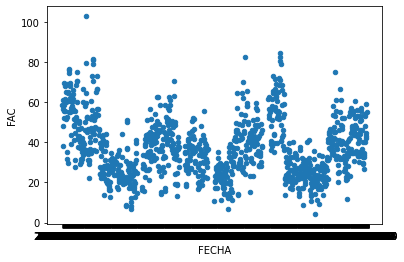

In [27]:
cdmx_bydatePM10.reset_index().plot(kind='scatter', x='FECHA', y='FAC')